In [1]:
import numpy as np
import numpy.random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE

In [3]:
from load import read_data, read, write, get_full_prepared_data_with_upsample
from parameters import RANDOM_SEED, SCORERS, TARGET_FEATURE, TEST_SIZE
from preparing import (MyOheHotEncoder, MyOrdinalEncoder, MyMinMaxScaler, ColumnsSorter,
                       EmptyColFiller, MyPolynomialFeatures, ordinal_encoding, one_hot_encoding)
from model_preparing import simple_linear, simple_forest, simple_catboost, fast_catboost

In [4]:
# %%time
# f, ft, fp, inverse_target_replacer = get_full_prepared_data_with_upsample()

# result1 = try_each_col(fast_catboost, ft)
# write('res1.pickle', result1)

# result2 = try_wo_each_col(fast_catboost, ft, False)
# write('res2.pickle', result2.drop(columns='model'))

# result3 = try_cols_in_order(fast_catboost, ft, result1.sort_values('test', ascending=False)['col'][:-10])
# write('res3.pickle', result3.drop(columns='model'))

In [5]:
# f = read_data(all_=False, processing=True, split_to_f_t=False, split_to_train_test=False, retain_target=True)
# for i in range(3):
#     f[f'random_{i + 1}'] = numpy.random.rand(f.shape[0])
# f = f.drop(columns=['school_finish_year', 'pension', 'guardianship', 'birthday', 'birthday_month'])
# f, e = ordinal_encoding(f)
# target_replacer = {4: 0, 3: 1, -1: 2}
# inverse_target_replacer = {y: x for x, y in target_replacer.items()}
# f[TARGET_FEATURE] = f[TARGET_FEATURE].replace(target_replacer)
# f1, f2 = train_test_split(f, test_size=TEST_SIZE, random_state=RANDOM_SEED, stratify=f[TARGET_FEATURE])
# f1, t1, f2, t2 = f1.drop(columns=TARGET_FEATURE), f1[TARGET_FEATURE], f2.drop(columns=TARGET_FEATURE), f2[TARGET_FEATURE]

f, ft, fp = get_full_prepared_data_with_upsample()
f1, t1 = ft[0]
for i in range(3):
    f1[f'random_{i + 1}'] = numpy.random.rand(f1.shape[0])

In [6]:
model = fast_catboost([(f1, t1)])

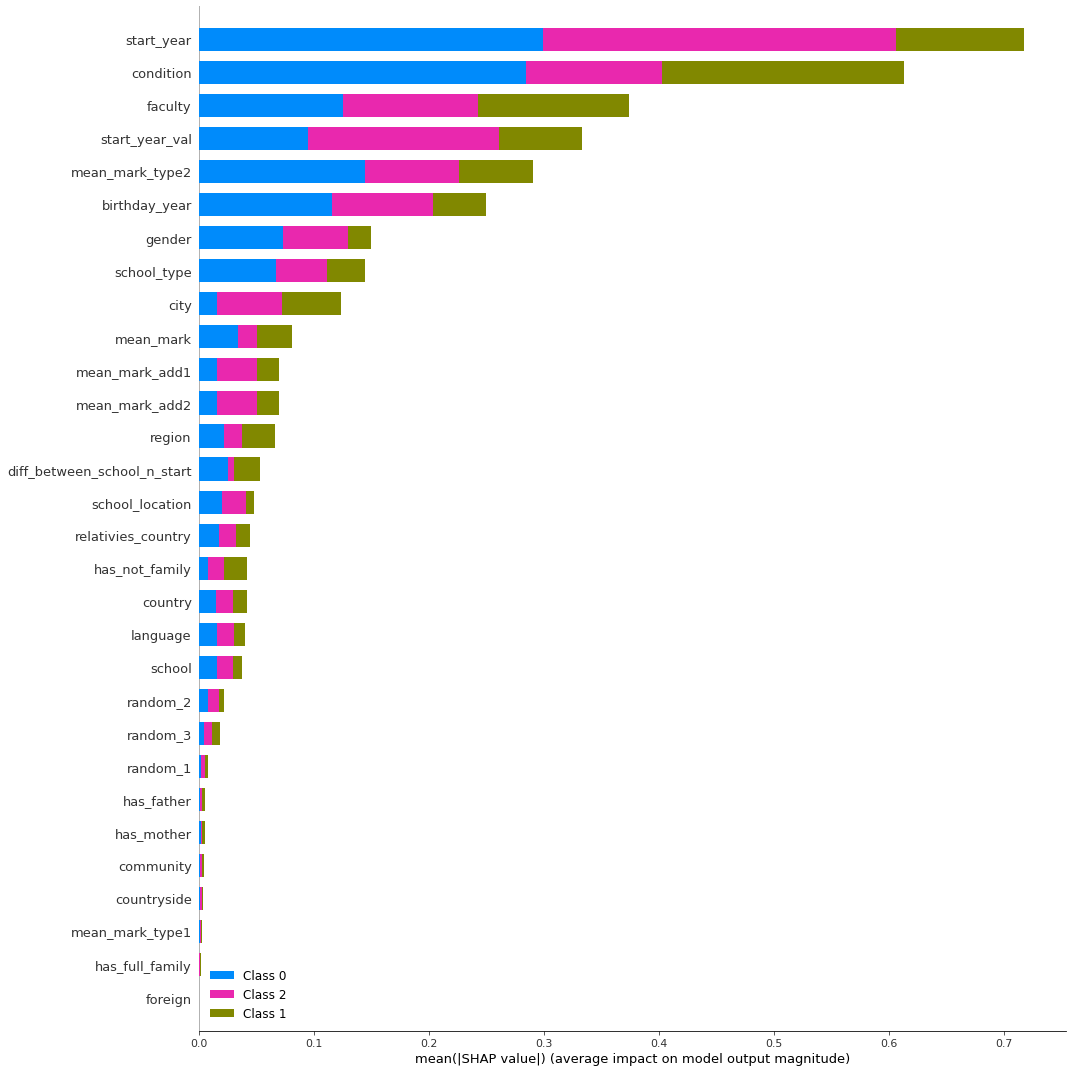

In [7]:
data = f1.sample(2000)
shap_test = shap.TreeExplainer(model[-1]).shap_values(data)
shap.summary_plot(shap_test, data,
                  max_display=100, plot_size=(15, 0.5 * len(f1.columns)))

In [8]:
print(*[f"'{x[1]}'," for x in sorted(zip(abs(shap_test[1]).mean(axis=0), f1.columns), key=lambda x: x[0], reverse=True)])

'condition', 'faculty', 'start_year', 'start_year_val', 'mean_mark_type2', 'city', 'birthday_year', 'school_type', 'mean_mark', 'region', 'diff_between_school_n_start', 'has_not_family', 'gender', 'mean_mark_add1', 'mean_mark_add2', 'country', 'relativies_country', 'language', 'school', 'school_location', 'random_3', 'random_2', 'random_1', 'has_father', 'has_mother', 'community', 'countryside', 'has_full_family', 'mean_mark_type1', 'foreign',


In [9]:
a = ('condition', 'start_year', 'group_code_add_0_2', 'faculty', 'group_code_add_2_1', 'group_code_add_1_1', 'mean_mark', 'school_type', 'years_old', 'start_year_val_exp3_scale_fun', 'start_year_val_r_scale_fun', 'group_code_add_3_2', 'years_old_exp5_scale_fun', 'gender', 'group_code_add_1_2', 'birthday_year', 'years_old_r_scale_fun', 'years_old_exp3_scale_fun', 'start_year_val_sqrt_scale_fun', 'start_year_val_expexp_scale_fun',
            'mean_mark_type2', 'mean_mark_type1', 'mean_mark_add2', 'mean_mark_add1', 'city')
b = [x[1] for x in sorted(zip(abs(shap_test[1]).mean(axis=0), f1.columns), key=lambda x: x[0], reverse=True)]
c = [x for x in b if x not in a]
print(*[f"'{x}'," for x in c])

'start_year_val', 'region', 'diff_between_school_n_start', 'has_not_family', 'country', 'relativies_country', 'language', 'school', 'school_location', 'random_3', 'random_2', 'random_1', 'has_father', 'has_mother', 'community', 'countryside', 'has_full_family', 'foreign',


The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


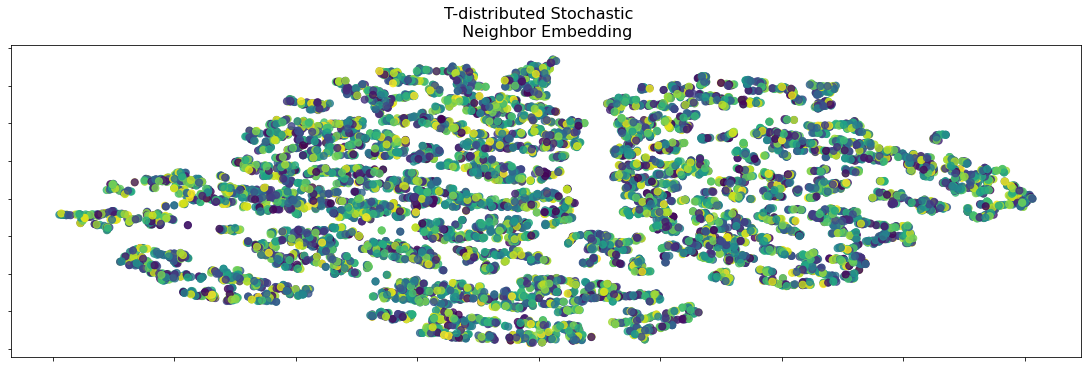

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


KeyboardInterrupt: 

In [10]:
from sklearn import manifold, datasets
from matplotlib import ticker

n_samples = f1.shape[0]
S_points, S_color = datasets.make_s_curve(n_samples, random_state=RANDOM_SEED)

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(15, 5), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()

for i in (10, 30, 50, 100):
    t_sne = TSNE(n_components=2,
                 perplexity=i,
                 n_iter=5000,
                 init="random",
                 random_state=RANDOM_SEED)
    S_t_sne = t_sne.fit_transform(f1.values)
    plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")